## Project 4


In [16]:
import pandas as pd
import numpy as np
import keras

import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
race_df = pd.read_csv('Merged_Data/merged_data.csv')
race_df.head()

/var/folders/kl/m0y8txln53774pt40hp8gplr0000gn/T/ipykernel_5829/1906195333.py:1: DtypeWarning: Columns (11,19,46) have mixed types. Specify dtype option on import or set low_memory=False.
  race_df = pd.read_csv('Merged_Data/merged_data.csv')


,Unnamed: 0,rid,course,time,date,title,rclass,band,ages,distance,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,0,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Pour Moi,Laughing Water,Duke Of Marmalade,9.0,1.199095,66.0,1.0,1.0,NaN
1,1,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,110.0,Getaway,Shouette,Sadler's Wells,9.0,1.199095,65.0,0.0,1.0,NaN
2,2,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Vale Of York,Finnmark,Halling,9.0,1.199095,72.0,0.0,1.0,NaN
3,3,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Sixties Icon,Highland Jig,Norse Dancer,9.0,1.199095,72.0,0.0,0.0,NaN
4,4,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,NaN,Iffraaj,Hallowed Park,Barathea,9.0,1.199095,72.0,0.0,0.0,NaN


In [3]:
print(race_df.columns)

Index(['Unnamed: 0', 'rid', 'course', 'time', 'date', 'title', 'rclass',
       'band', 'ages', 'distance', 'condition', 'hurdles', 'prizes',
       'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
       'currency', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'overWeight', 'outHandicap', 'headGear', 'RPR',
       'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place', 'price'],
      dtype='object')


In [4]:
race_df.index

RangeIndex(start=0, stop=149589, step=1)

In [5]:
race_df = race_df.drop(columns = "price")
print(race_df.columns)

Index(['Unnamed: 0', 'rid', 'course', 'time', 'date', 'title', 'rclass',
       'band', 'ages', 'distance', 'condition', 'hurdles', 'prizes',
       'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
       'currency', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'overWeight', 'outHandicap', 'headGear', 'RPR',
       'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place'],
      dtype='object')


In [6]:
race_df = race_df.drop(columns = "headGear")
print(race_df.columns)


Index(['Unnamed: 0', 'rid', 'course', 'time', 'date', 'title', 'rclass',
       'band', 'ages', 'distance', 'condition', 'hurdles', 'prizes',
       'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
       'currency', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'overWeight', 'outHandicap', 'RPR', 'TR', 'OR',
       'father', 'mother', 'gfather', 'runners', 'margin', 'weight', 'res_win',
       'res_place'],
      dtype='object')


In [7]:
race_df = race_df.drop(columns = "outHandicap")
print(race_df.columns)

Index(['Unnamed: 0', 'rid', 'course', 'time', 'date', 'title', 'rclass',
       'band', 'ages', 'distance', 'condition', 'hurdles', 'prizes',
       'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
       'currency', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'overWeight', 'RPR', 'TR', 'OR', 'father',
       'mother', 'gfather', 'runners', 'margin', 'weight', 'res_win',
       'res_place'],
      dtype='object')


In [8]:
race_df = race_df.drop(columns = "currency")
print(race_df.columns)

Index(['Unnamed: 0', 'rid', 'course', 'time', 'date', 'title', 'rclass',
       'band', 'ages', 'distance', 'condition', 'hurdles', 'prizes',
       'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
       'horseName', 'age', 'saddle', 'decimalPrice', 'isFav', 'trainerName',
       'jockeyName', 'position', 'positionL', 'dist', 'weightSt', 'weightLb',
       'overWeight', 'RPR', 'TR', 'OR', 'father', 'mother', 'gfather',
       'runners', 'margin', 'weight', 'res_win', 'res_place'],
      dtype='object')


In [9]:
race_df = race_df.drop(columns = "hurdles")
print(race_df.columns)

Index(['Unnamed: 0', 'rid', 'course', 'time', 'date', 'title', 'rclass',
       'band', 'ages', 'distance', 'condition', 'prizes', 'winningTime',
       'prize', 'metric', 'countryCode', 'ncond', 'class', 'horseName', 'age',
       'saddle', 'decimalPrice', 'isFav', 'trainerName', 'jockeyName',
       'position', 'positionL', 'dist', 'weightSt', 'weightLb', 'overWeight',
       'RPR', 'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place'],
      dtype='object')


In [10]:
race_df.isnull().sum() #checking missing values

Unnamed: 0           0
rid                  0
course               0
time                 0
date                 0
title                0
rclass           82432
band             95566
ages                 0
distance             0
condition            0
prizes               0
winningTime          0
prize                0
metric               0
countryCode          0
ncond                0
class                0
horseName           76
age                 76
saddle              82
decimalPrice        76
isFav               76
trainerName         97
jockeyName          79
position            76
positionL        21303
dist             36028
weightSt            76
weightLb            76
overWeight      144689
RPR              72522
TR              101845
OR               70043
father              76
mother              77
gfather            112
runners             76
margin              76
weight              76
res_win             76
res_place           76
dtype: int64

In [11]:
race_df.drop_duplicates()

,Unnamed: 0,rid,course,time,date,title,rclass,band,ages,distance,...,TR,OR,father,mother,gfather,runners,margin,weight,res_win,res_place
0,0,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,103.0,NaN,Pour Moi,Laughing Water,Duke Of Marmalade,9.0,1.199095,66.0,1.0,1.0
1,1,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,89.0,110.0,Getaway,Shouette,Sadler's Wells,9.0,1.199095,65.0,0.0,1.0
2,2,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,88.0,NaN,Vale Of York,Finnmark,Halling,9.0,1.199095,72.0,0.0,1.0
3,3,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,75.0,NaN,Sixties Icon,Highland Jig,Norse Dancer,9.0,1.199095,72.0,0.0,0.0
4,4,10312,Fakenham,02:55,20/01/01,Happy New Year Maiden Hurdle (Div I),Class 4,NaN,4yo+,2m,...,67.0,NaN,Iffraaj,Hallowed Park,Barathea,9.0,1.199095,72.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149584,149584,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,...,NaN,NaN,Alamosa,Karaka,Kings Island II,11.0,1.191591,58.0,0.0,0.0
149585,149585,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,...,NaN,NaN,Proisir,Aimee's Idol,Colombia,11.0,1.191591,57.0,0.0,0.0
149586,149586,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,...,NaN,NaN,Tavistock,Laoghaire,Pins,11.0,1.191591,58.0,0.0,0.0
149587,149587,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,...,NaN,NaN,Per Incanto,Ages Past,Slavic,11.0,1.191591,58.0,0.0,0.0


In [12]:
# Checking the number of rows before dropping duplicates
rows_before = race_df.shape[0]

# Remove duplicate rows
race_df = race_df.drop_duplicates()

# Check the number of rows after dropping duplicates
rows_after = race_df.shape[0]

# Calculate the number of rows dropped
rows_dropped = rows_before - rows_after

print(f"Number of duplicate rows dropped: {rows_dropped}")


Number of duplicate rows dropped: 0


In [13]:
race_df['res_win'].isnull().sum()
race_df['res_win'].value_counts()

res_win
0.0    134777
1.0     14736
Name: count, dtype: int64

#The dataset is filtered to include only the columns of interest (father, mother, res_win)
#Rows with missing values in the "res_win" column are dropped.
#Categorical columns (father and mother) are encoded with numerical labels using LabelEncoder.

#The data is split into training and testing sets using a test size of 20% and a random state of 42.
#The training and testing features (X_train and X_test) are standardized using StandardScaler


#Class weights are calculated using the compute_class_weight function from sklearn.utils.class_weight.
#The "balanced" option is used to automatically compute the weights based on the class distribution in the training set.



#A neural network model is created using the Sequential API from Keras.
#The model consists of three dense layers with 96,150, 1 units and a sigmoid relu activation function.
#The model is compiled with the Adam optimizer, binary crossentropy loss function, and accuracy metric



#The model is trained using the fit function.
#The training data (X_train and y_train) is used, with a 10 epochs, and the calculated class weights.
The validation data (X_test and y_test) is used for validation during training.

In [104]:

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense


# Create a new DF with the desired columns
data = race_df[['father', 'mother', 'res_win']].copy()

# Drop rows with empty values in the "res_win" column
data.dropna(subset=['res_win'], inplace=True)

# Convert categorical columns to numerical labels
label_encoder = LabelEncoder()
data['father'] = label_encoder.fit_transform(data['father'])
data['mother'] = label_encoder.fit_transform(data['mother'])

# Split the data into features (X) and target (y)
X = data[['father', 'mother']]
y = data['res_win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,  test_size=0.2, random_state=1)





In [105]:
# Create a standard scaler
scaler = StandardScaler()

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
print("Scaled X_train:", X_train)
print("Scaled X_test:", X_test)
print("Class Weights:", class_weights)


Scaled X_train: [[-0.61221456  1.21736911]
 [-1.6676032  -1.49711357]
 [-1.37691303  0.39408648]
 ...
 [-0.97754139  1.66199875]
 [ 0.66970291 -0.3906524 ]
 [ 0.35544326 -0.94609531]]
Scaled X_test: [[-0.84921871  1.0608343 ]
 [-1.22371145  1.07400997]
 [-0.67244766 -0.35505843]
 ...
 [ 0.32008905 -1.39367474]
 [-0.99194496 -0.51041332]
 [ 0.44841174 -1.48678935]]
Class Weights: [0.55450988 5.0863242 ]


In [106]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(96, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(150, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 96)                288       
                                                                 
 dense_67 (Dense)            (None, 150)               14550     
                                                                 
 dense_68 (Dense)            (None, 1)                 151       
                                                                 
Total params: 14,989
Trainable params: 14,989
Non-trainable params: 0
_________________________________________________________________


In [107]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(X_train.shape)
print(X_test.shape)



(119610, 2)
(29903, 2)


In [103]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, class_weight=dict(enumerate(class_weights)), validation_data=(X_test, y_test))





Epoch 1/10
3738/3738 [==============================] - 6s 1ms/step - loss: 0.6963 - accuracy: 0.4998 - val_loss: 0.7993 - val_accuracy: 0.0996
Epoch 2/10
3738/3738 [==============================] - 6s 2ms/step - loss: 0.6964 - accuracy: 0.4889 - val_loss: 0.7498 - val_accuracy: 0.0996
Epoch 3/10
3738/3738 [==============================] - 6s 1ms/step - loss: 0.6958 - accuracy: 0.5086 - val_loss: 0.6748 - val_accuracy: 0.9004
Epoch 4/10
3738/3738 [==============================] - 6s 1ms/step - loss: 0.6961 - accuracy: 0.4769 - val_loss: 0.6597 - val_accuracy: 0.8730
Epoch 5/10
3738/3738 [==============================] - 6s 2ms/step - loss: 0.6958 - accuracy: 0.4983 - val_loss: 0.6378 - val_accuracy: 0.9004
Epoch 6/10
3738/3738 [==============================] - 5s 1ms/step - loss: 0.6952 - accuracy: 0.4949 - val_loss: 0.6675 - val_accuracy: 0.9004
Epoch 7/10
3738/3738 [==============================] - 5s 1ms/step - loss: 0.6956 - accuracy: 0.4911 - val_loss: 0.7385 - val_accuracy:

In [109]:
# Evaluate the model performance
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


935/935 [==============================] - 1s 927us/step - loss: 0.6632 - accuracy: 0.8977
Accuracy: 0.8976691365242004


In [110]:
# Get the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_accuracy) + 1)


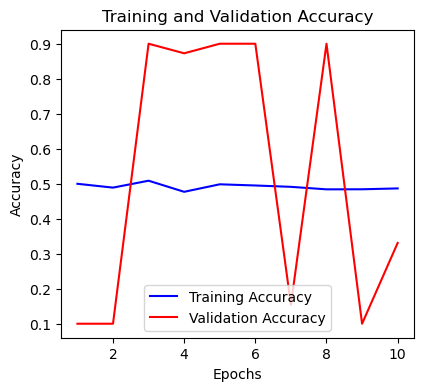

In [111]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

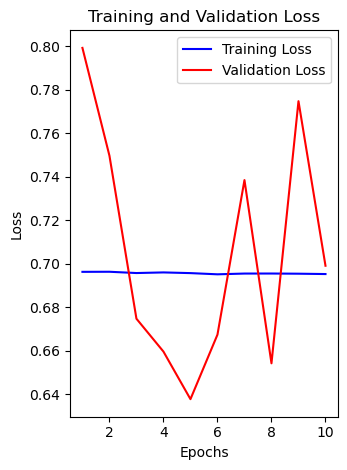

In [112]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [113]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

935/935 [==============================] - 1s 762us/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     26925
         1.0       0.12      0.00      0.01      2978

    accuracy                           0.90     29903
   macro avg       0.51      0.50      0.48     29903
weighted avg       0.82      0.90      0.85     29903



In [114]:
# here using Decision tree classifier to compare the models

In [117]:

# Create a new DF with the desired columns
data = race_df[['father', 'mother', 'res_win']].copy()

# Drop rows with empty values in the "res_win" column
data.dropna(subset=['res_win'], inplace=True)

# Convert categorical columns to numerical labels
label_encoder = LabelEncoder()
data['father'] = label_encoder.fit_transform(data['father'])
data['mother'] = label_encoder.fit_transform(data['mother'])

# Split the data into features (X) and target (y)
X = data[['father', 'mother']]
y = data['res_win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8821857338728556


In [118]:
#confusion matrix 

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[26199   790]
 [ 2733   181]]


the model correctly identified 179 horses that won the race (TP)
the model correctly identified 26,198 horses that did not win the race ( true neg)
the model incorrectly predicted 791 horses as winners when they didn't win ( FP)
the model incorrectly predicted 2735 horses as non- winners when they did win ( False Neg)

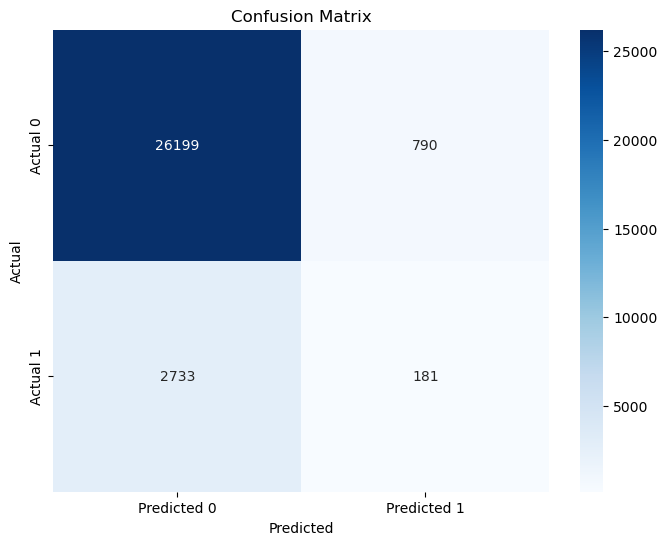

In [119]:
import seaborn as sns

# Create a DF from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Actual 0 label corresponds to the horses that did not win the race.
#'Actual 1' corresponds to the horses that won the race.

#'Predicted 0' label indicating the instance that the model predicted as not winning the race.

#'Predicted 1' label indicating the model instance the model predicted as winning the race

In [120]:
from sklearn.metrics import classification_report
# Generating classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     26989
         1.0       0.19      0.06      0.09      2914

    accuracy                           0.88     29903
   macro avg       0.55      0.52      0.52     29903
weighted avg       0.84      0.88      0.85     29903



# Classification report  
#The overall accuracy of the model is 0.88 indicating that the model correctly predicts the winning or non-winning status of the horses in 88% of the instances

#Precision is the proportion of correctly predicted positive instances out of the total instances predicted as positive. 
#For class 0, the precision is 0.91, indicating that 91% of the instances predicted as not winning the race (class 0) were actually not winners. 
#for class 1, the precision is 0.19, suggesting that only 19% of the instances predicted as winners (class 1) were truly winners






In [121]:
# Print feature importance
feature_importance = clf.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.24843561 0.75156439]
